In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
from scipy.stats import chi2_contingency

In [3]:
from scipy import stats
np.random.seed(seed=42)

from collections import Counter

## The focus of this Walmart dataset will be the following
* Focus of the three catgories Food, Household, and Hobbies
* The dataset dates are from 1/2011 - 1/2016. Conduct t - test of Average sales of the Household items
* Perform analysis to see if there's a seasonal trend amougst the category item


In [4]:
dates = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/walmartcalender.csv")

In [5]:
dates.to_csv("/Users/aaronkg1/Downloads/walmart_analysis/walmartcalender.csv")

In [6]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1969 non-null   int64 
 1   Unnamed: 0.1    1969 non-null   int64 
 2   Unnamed: 0.1.1  1969 non-null   int64 
 3   date            1969 non-null   object
 4   wm_yr_wk        1969 non-null   int64 
 5   weekday         1969 non-null   object
 6   wday            1969 non-null   int64 
 7   month           1969 non-null   int64 
 8   year            1969 non-null   int64 
 9   d               1969 non-null   object
 10  event_name_1    162 non-null    object
 11  event_type_1    162 non-null    object
 12  event_name_2    5 non-null      object
 13  event_type_2    5 non-null      object
 14  snap_CA         1969 non-null   int64 
 15  snap_TX         1969 non-null   int64 
 16  snap_WI         1969 non-null   int64 
dtypes: int64(10), object(7)
memory usage: 261.6+ KB


In [7]:
dates.head(4)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,0,0,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,1,1,1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2,2,2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,3,3,3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0


In [8]:
date = dates[['date', 'd']]

In [9]:
date

,date,d
0,2011-01-29,d_1
1,2011-01-30,d_2
2,2011-01-31,d_3
3,2011-02-01,d_4
4,2011-02-02,d_5
...,...,...
1964,2016-06-15,d_1965
1965,2016-06-16,d_1966
1966,2016-06-17,d_1967
1967,2016-06-18,d_1968


In [10]:
dates.tail(4)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1965,1965,1965,1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,1966,1966,1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,1967,1967,1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,1968,1968,1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [11]:
sport = dates[dates['event_type_1'] == 'Sporting']
sport

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
8,8,8,8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
122,122,122,122,2011-05-31,11118,Tuesday,4,5,2011,d_123,NBAFinalsStart,Sporting,NaN,NaN,0,0,0
134,134,134,134,2011-06-12,11120,Sunday,2,6,2011,d_135,NBAFinalsEnd,Sporting,NaN,NaN,0,1,1
372,372,372,372,2012-02-05,11202,Sunday,2,2,2012,d_373,SuperBowl,Sporting,NaN,NaN,1,1,1
500,500,500,500,2012-06-12,11220,Tuesday,4,6,2012,d_501,NBAFinalsStart,Sporting,NaN,NaN,0,1,1
509,509,509,509,2012-06-21,11221,Thursday,6,6,2012,d_510,NBAFinalsEnd,Sporting,NaN,NaN,0,0,0
736,736,736,736,2013-02-03,11302,Sunday,2,2,2013,d_737,SuperBowl,Sporting,NaN,NaN,1,1,1
859,859,859,859,2013-06-06,11319,Thursday,6,6,2013,d_860,NBAFinalsStart,Sporting,NaN,NaN,1,1,1
873,873,873,873,2013-06-20,11321,Thursday,6,6,2013,d_874,NBAFinalsEnd,Sporting,NaN,NaN,0,0,0
1100,1100,1100,1100,2014-02-02,11401,Sunday,2,2,2014,d_1101,SuperBowl,Sporting,NaN,NaN,1,0,1


In [12]:
e = dates[dates['event_type_1'] == 'Religious']
e.event_type_1.value_counts()

Religious    55
Name: event_type_1, dtype: int64

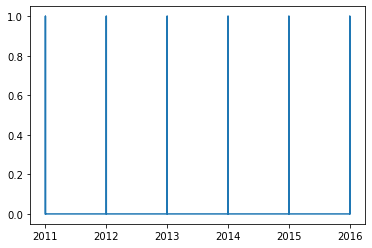

In [13]:
#fig, ax = plt.subplots()
plt.plot(dates["year"], dates['event_type_1'] == 'Religious')
plt.xticks(rotation=0)
plt.show()



In [14]:
dates.event_type_1.value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [15]:
dates.event_type_2.count()

5

In [16]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1969 non-null   int64 
 1   Unnamed: 0.1    1969 non-null   int64 
 2   Unnamed: 0.1.1  1969 non-null   int64 
 3   date            1969 non-null   object
 4   wm_yr_wk        1969 non-null   int64 
 5   weekday         1969 non-null   object
 6   wday            1969 non-null   int64 
 7   month           1969 non-null   int64 
 8   year            1969 non-null   int64 
 9   d               1969 non-null   object
 10  event_name_1    162 non-null    object
 11  event_type_1    162 non-null    object
 12  event_name_2    5 non-null      object
 13  event_type_2    5 non-null      object
 14  snap_CA         1969 non-null   int64 
 15  snap_TX         1969 non-null   int64 
 16  snap_WI         1969 non-null   int64 
dtypes: int64(10), object(7)
memory usage: 261.6+ KB


In [17]:
dates.event_name_1.value_counts()

ValentinesDay          6
LentStart              6
Pesach End             6
LentWeek2              6
Ramadan starts         6
MemorialDay            6
PresidentsDay          6
NBAFinalsEnd           6
SuperBowl              6
Mother's day           6
Purim End              6
NBAFinalsStart         6
StPatricksDay          6
ColumbusDay            5
Easter                 5
Chanukah End           5
NewYear                5
IndependenceDay        5
OrthodoxChristmas      5
Thanksgiving           5
MartinLutherKingDay    5
EidAlAdha              5
OrthodoxEaster         5
VeteransDay            5
Cinco De Mayo          5
Eid al-Fitr            5
Christmas              5
Halloween              5
LaborDay               5
Father's day           4
Name: event_name_1, dtype: int64

In [18]:
sales = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/sales_train_validation.csv")

In [19]:
sales.to_csv(("/Users/aaronkg1/Downloads/walmart_analysis/sales_train_validation.csv")

SyntaxError: unexpected EOF while parsing (<ipython-input-19-efcfb3a9e125>, line 1)

In [ ]:
sales.head(4)

In [ ]:
sales.info()

In [ ]:
sales.columns

In [ ]:
sales.describe()

In [ ]:
sales.cat_id.value_counts()

In [ ]:
sales.dept_id.value_counts()

In [ ]:
sales.head(4)


Text(0, 0.5, 'sales')

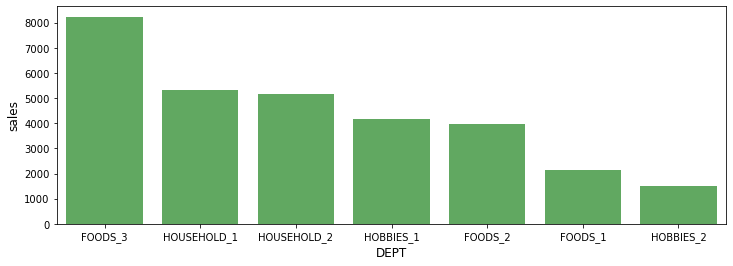

In [20]:
sal = sales.dept_id.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(sal.index, sal.values, alpha=0.8, color=p[2])
plt.xlabel('DEPT', fontsize=12)
plt.ylabel('sales', fontsize=12)

Text(0, 0.5, 'sales')

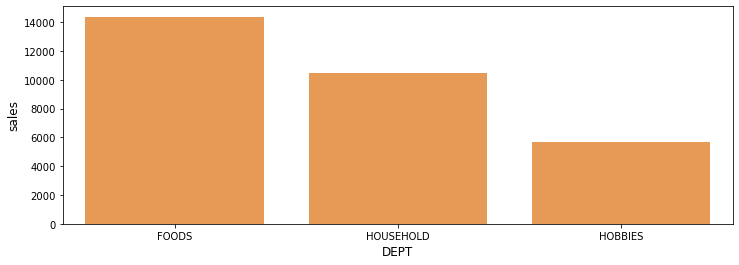

In [21]:
cat = sales.cat_id.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cat.index, cat.values, alpha=0.8, color=p[1])
plt.xlabel('DEPT', fontsize=12)
plt.ylabel('sales', fontsize=12)

In [ ]:
sales[sales['cat_id'] == 'FOODS'].count()

In [ ]:
SAL = sales['cat_id'] == 'HOUSEHOLD'
SAL.value_counts()

In [ ]:
sales[sales['cat_id'] == 'HOBBIES'].count()

#### Food_3 seems to have the most sales of Walmart sales item. 

* Let see if we can find out what type of food are consideer Food_3. 
        --- Let see if it's seasonal. 

In [ ]:
sales.groupby(['dept_id'])['item_id'].unique()

In [ ]:
sales.groupby(['dept_id'])['item_id'].value_counts()

In [22]:
prices = pd.read_csv("/Users/aaronkg1/Downloads/walmart_analysis/sell_prices.csv")

In [ ]:
prcies.to_csv("/Users/aaronkg1/Downloads/walmart_analysis/sell_prices.csv")

In [ ]:
prices.info()

In [ ]:
group = prices.groupby(['store_id'])['sell_price']
group.value_counts()

In [23]:
prices.shape

(6841121, 4)

In [ ]:
prices.store_id.unique()

In [ ]:
prices['store_id'].value_counts()

In [ ]:
ca = prices.groupby([prices['store_id'] == 'CA_1'])['sell_price']
ca.sum()

In [ ]:
ca2 = prices.groupby([prices['store_id'] == 'CA_2'])['sell_price']
ca2.c

In [ ]:
ca3 = prices.groupby([prices['store_id'] == 'CA_3'])['sell_price']
ca3.mean()

In [ ]:
prices.wm_yr_wk.count() 

In [24]:
item = prices.item_id.value_counts()

Text(0, 0.5, 'sales')

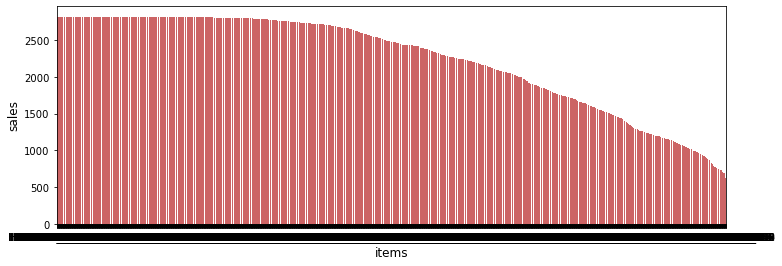

In [25]:
plt.figure(figsize=(12,4))
sns.barplot(item.index, item.values, alpha=0.8, color=p[3])
plt.xlabel('items', fontsize=12)
plt.ylabel('sales', fontsize=12)


### I'll be merrging Category columns from the sales dataset, to the dates dataset.
* I also will be creating a new column stating for just the year date.
* Will be creating alternate dataframes with household goods, and Hobbies

df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left')

melt>>>>>>df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [26]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']) 

In [ ]:
df

In [27]:
df.columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales']

In [28]:
sales_date = pd.merge(df, date, on='d', how='inner')

In [ ]:
sales_date.head(3)

### Explore the sales data by category

### Focusing on the sales dates dataset, with 'Household' and sales by 'year' in the center.
- Conduct T-test with 'Household'ietms base on sales by year.
1. Null Hypothesis: The avgerage sales in 'Household' category are almost the same every year as independent of Hobbies category. Conduct Random T-Test by different year
2. If Hypothesis is rejected, See if the averages are seasonally the same in the Household items. 

In [29]:
sd = sales_date[sales_date['cat_id'] == 'HOUSEHOLD']

# sd is the dataset/mask for Household category

In [30]:
H = sales_date['cat_id'] == 'HOBBIES'

In [32]:
sales_date['date'] = pd.to_datetime(sales_date['date'])

In [33]:
sales_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   id        object        
 1   item_id   object        
 2   dept_id   object        
 3   cat_id    object        
 4   store_id  object        
 5   state_id  object        
 6   d         object        
 7   sales     int64         
 8   date      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.3+ GB


In [ ]:
# stats.ttest_ind(sales_date[sd]['sales'], sales_date[H]['sales'], equal_var=False)

In [34]:
sales_date['year'] = sales_date.date.dt.year

In [ ]:
sales_date.head(5)

In [ ]:
sales_date.describe()

In [35]:
sf = sales_date['cat_id'] == 'FOODS'

In [36]:
# Total sales for the Food Category
sales_date[sf]['sales'].sum()

45089939

In [37]:
sales_date[sf]['sales'].mean()

1.6402419296459305

In [38]:
# Total item count of the Food category
sales_date[sf]['item_id'].count()

27489810

### Creating a dataframe With only the Household items, seperating by year

In [39]:
# The Household total sales from 2011-2016
sd.sales.sum()

14480670

In [40]:
# Total items in the Household category
sd.item_id.count()

20029110

In [41]:
sd.sales.std()

2.086400445648674

In [42]:
np.std(sd['sales'])

2.086400393564471

In [64]:
sd.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date
565,HOUSEHOLD_1_001_CA_1_validation,HOUSEHOLD_1_001,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,3,2011-01-29
566,HOUSEHOLD_1_002_CA_1_validation,HOUSEHOLD_1_002,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,1,2011-01-29
567,HOUSEHOLD_1_003_CA_1_validation,HOUSEHOLD_1_003,HOUSEHOLD_1,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29


In [43]:
np.std(sd['sales'], ddof=1)

2.086400445648674

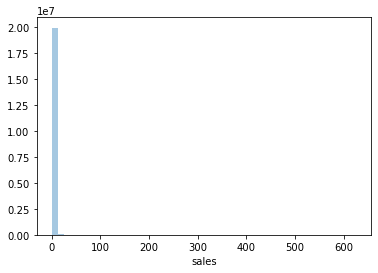

In [44]:
sns.distplot(sd['sales'], kde=False)

In [93]:
h = sales_date[sales_date['cat_id'] == 'HOBBIES']

In [85]:
# Total number of items in the Hobbies category
sales_date[h]['item_id'].count()

10808450

In [47]:
# Total number of sales in the hobbies category
h.sales.sum()

6124800

In [48]:
h.sales.std()

2.0366417006610633

### Creating dataframes with only Hobbies realted content and seperating by year

In [95]:
yr_one = sales_date['year'] == 2011
yr_one = h['sales'][yr_one]

In [96]:
yr_two = sales_date['year'] == 2012
yr_two = h['sales'][yr_one]

In [98]:
yr_thr = sales_date['year'] == 2013
yr_thr = h['sales'][yr_thr]

In [99]:
yr_four = sales_date['year'] == 2014
yr_four = h['sales'][yr_thr]

In [101]:
yr_five = sales_date['year'] == 2015
yr_five = h['sales'][yr_thr]

In [102]:
yr_six = sales_date['year'] == 2016
yr_six = h['sales'][yr_thr]

##### Lets Make a dataframe for the Household/sales category for each year (2011-2016)

In [53]:
sales_date['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016])

In [103]:
year_one = sales_date['year'] == 2011
year_one = sd['sales'][year_one]

In [56]:
year_one.sum()

1658570

In [57]:
np.mean([year_one])

0.470064250267119

In [104]:
year_two = sales_date['year'] == 2012

In [67]:
year_two = sd['sales'][year_two]

In [68]:
np.mean([year_two])

0.6371918726937751

In [69]:
year_two.mean()

0.6371918726937751

In [70]:
year_thr = sales_date['year'] == 2013

In [71]:
year_thr = sd['sales'][year_thr]

In [72]:
year_thr.mean()

0.7683301278277139

In [73]:
np.mean([year_thr])

0.7683301278277139

In [74]:
year_four = sales_date['year'] == 2014

In [75]:
year_four = sd['sales'][year_four]

In [76]:
year_four.mean()

0.7615771087647683

In [77]:
year_five = sales_date['year'] == 2015

In [78]:
year_five = sd['sales'][year_five]

In [79]:
year_five.mean()

0.8888542607057346

In [80]:
year_six = sales_date['year'] == 2016
year_six = sd['sales'][year_six]


In [105]:
stats.ttest_ind(year_four, year_six, equal_var=False)

Ttest_indResult(statistic=-81.2583329472318, pvalue=0.0)

In [106]:
stats.ttest_ind(year_thr, yr_thr, equal_var=False)

Ttest_indResult(statistic=96.38652428604249, pvalue=0.0)

### T-test conducted on Household items in 2013 vs Hobbies items in 2013

* Result shows that we can a P = 0.0
* Which means we can reject the null Hypothesis That Household items and 
* Hobbie items have different averages in any given year

In [107]:
year_one.std()

1.5545855498719985

In [ ]:
yr_one.std()

In [ ]:
np.mean(sd)

In [ ]:
obs = pd.crosstab(sales_date[sd][year_one], sales_date[h][yr_four])
obs

In [ ]:
chi2, p, dof, expected = chi2_contingency(obs.values)

print(f'The test statistic is {chi2}. \nThe p value is {p}.')